In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [2]:
Nt = 101
Nx = 51
Ny = 51

x = np.linspace(0,10,Nx)
y = np.linspace(0,10,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

k = 0.0075

lambda_ = (k*deltat)/deltax**2
mu_ = (k*deltat)/deltay**2
print(deltat,deltay,deltax)

0.1 0.2 0.2


In [3]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [4]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    
    
    return T

In [5]:
T = InitT()


In [6]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        #T[l,0,:] = np.sin(20*t[l])
        T[l,:,0] = np.exp(-2*(np.pi**2)*t[l])*np.sin(np.pi*y)
        T[l,:,-1] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*x)
    
        T[l,0,:] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*(1+y))
        T[l,-1,:] = np.exp(-2*np.pi**2*t[l])*np.sin(np.pi*(1+x))
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])

In [7]:
GetSolution()

100%|██████████| 100/100 [00:00<00:00, 166.87it/s]


<IPython.core.display.Javascript object>


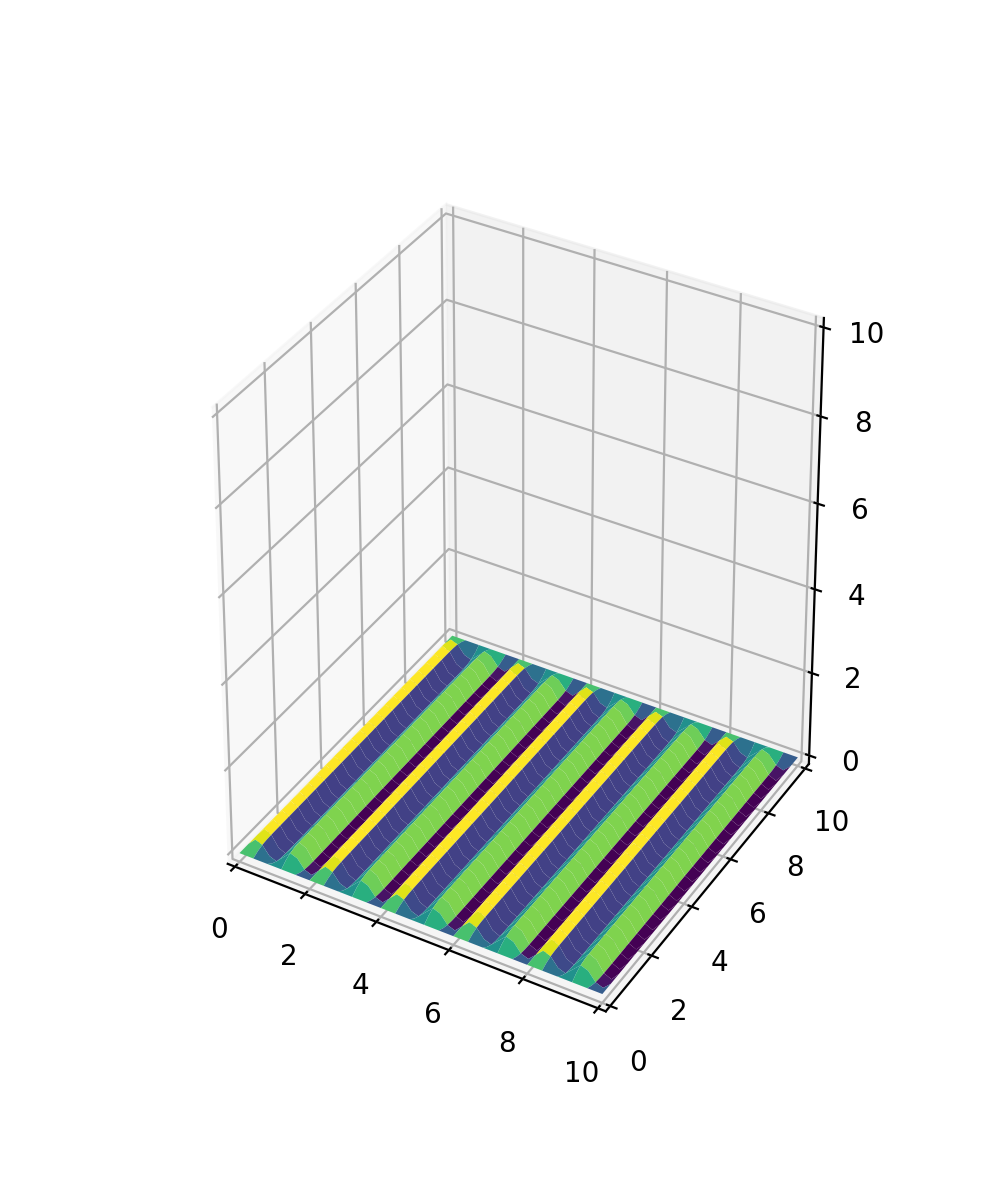

In [8]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,10)
    ax.set_ylim3d(0,10)
    ax.set_zlim3d(0,10)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)